# Import

Sem pôjde hlavička


In [1]:
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np

import plotly.express as px

import folium

In [2]:
# Get the current working directory
current_dir = os.getcwd()

# Navigate one step above the current directory
parent_dir = os.path.dirname(current_dir)

# Construct the full path to your CSV file
csv_file_path = os.path.join(parent_dir, 'data_full.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now, 'df' contains your dataset from 'C:\Users\Doktor\Documents\GitHub\Bridges\data_full.csv'

## Rename Columns

In this step, we rename the columns of the DataFrame to make them more descriptive and readable for analysis.

In [3]:
# Rename the columns
df.rename(columns={
    'ID mosta': "Bridge_ID",
    'Okres': "District",
    'Longitude': "Longitude",
    'Latitude': "Latitude",
    'Material': "Material",
    'Názov mosta': "Bridge_Name",
    'Dĺžka premostenia': "Bridge_Length",
    'Rok postavenia': "Year_of_Construction",
    'Volná šírka mosta': "Bridge_Width",
    'Normána zaťažiteľnost': "Load_Capacity",
    'Trieda PK': "Road_Class",
    'Druh konštrukcie': "Type_of_Structure",
    'Kraj': "Region",
    'n_2012': "num_2012",
    'n_2013': "num_2013",
    'n_2014': "num_2014",
    'n_2015': "num_2015",
    'n_2016': "num_2016",
    'n_2017': "num_2017",
    'n_2018': "num_2018",
    'n_2019': "num_2019",
    'n_2020': "num_2020",
    'n_2021': "num_2021",
    'n_2022': "num_2022",
    'n_2023': "num_2023",
    'Predmet premostenia': "Bridge_Purpose"

}, inplace=True)

In [4]:
columns_to_remove = [str(i) for i in range(2012, 2024)]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

### Filtering Data in Pandas DataFrame

This code snippet filters a Pandas DataFrame to select rows based on two conditions:

1. Rows where the "num_2023" column is not equal to zero.
2. Rows where the "Bridge_Length" column is not a NaN value.

It uses the `~df["Bridge_Length"].isna()` condition to check for non-NaN values in the "Bridge_Length" column and combines the conditions using the `&` operator to ensure both conditions are met.


In [5]:
classified_bridges = df[(df["num_2023"] != 0) & (
    ~df["Bridge_Length"].isna()) & (df["Bridge_Length"] != "Nezistený")]

nan_category_bridges = classified_bridges[pd.isna(
    classified_bridges["Bridge_Length"])]
len(nan_category_bridges[["Bridge_ID", "Bridge_Length"]])

0

**Histogram of Bridge Length (Logarithmic Scale)**

In this plot, we visualize the distribution of bridge lengths using a histogram with a logarithmic x-axis scale. The dataset used is `classified_bridges["Bridge_Length"]`.

**Plot Details:**

- The histogram is created with logarithmic bins, enhancing the visibility of variations in bridge lengths.
- The x-axis represents "Bridge Length" in a logarithmic scale, making it suitable for visualizing a wide range of values.
- The y-axis represents the frequency of bridges within each bin.
- Each bin is annotated with the approximate mean length of bridges in that bin, displayed in meters.
- Y-axis ticks are customized to provide a clearer view of frequency.
- A semi-transparent grid is added to the y-axis for reference.

This histogram helps us understand the distribution of bridge lengths in the dataset, highlighting any trends or clusters in bridge lengths.


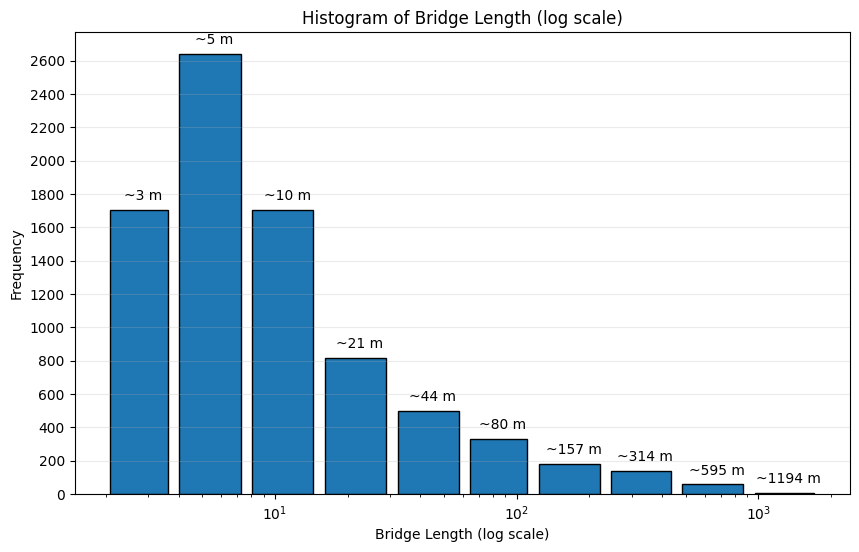

In [6]:
number_of_bins = 11
labels_blc = [str(i+1) for i in range(number_of_bins - 1)]  # Reduce by one

# Convert the "Bridge_Length" column to numeric (float) using .loc
classified_bridges = classified_bridges.copy()  # Create a copy of the DataFrame
classified_bridges.loc[:, "Bridge_Length"] = pd.to_numeric(
    classified_bridges["Bridge_Length"], errors="coerce")

# Define the parameters for the histogram plot
data = classified_bridges["Bridge_Length"]

log_bins = ([1.94,    3.75,    7.5,   15.0,  30.0,   60.0,  115.0,  230.0,
             450.0,  900.0, 1770.00])


# Create a histogram with logarithmic x-axis and adjust bin spacing (rwidth)

plt.figure(figsize=(10, 6))

hist, bins, _ = plt.hist(data, bins=log_bins, edgecolor='k', rwidth=0.85)

plt.xscale('log')  # Set x-axis to log scale

plt.xlabel("Bridge Length (log scale)")

plt.ylabel("Frequency")

plt.title("Histogram of Bridge Length (log scale)")


# Calculate and annotate the mean value for each bin

bin_means = [data[(data >= bin_start) & (data < bin_end)].mean()

             for bin_start, bin_end in zip(bins[:-1], bins[1:])]


for i, bin_mean in enumerate(bin_means):

    plt.annotate(f"~{bin_mean:.0f} m",

                 xy=(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i]),

                 xytext=(0, 5), textcoords='offset points',

                 ha='center', va='bottom')


# Customize the y-axis ticks and enable grid with transparency

# Adjust the range and step as needed

plt.yticks(np.arange(0, max(hist) + 1, 200))

plt.grid(True, axis='y', alpha=0.25)  # Set alpha for transparency

In [7]:
# Define the boundaries of the bins
bin_boundaries = list(log_bins)

# Create a list of category descriptions based on the bin boundaries
category_descriptions = [f"{bin_start:.2f} - {bin_end:.2f} m"
                         for bin_start, bin_end in zip(bin_boundaries[:-1], bin_boundaries[1:])]

# Create a dictionary to map category labels to descriptions
category_description_mapping = {label: description for label, description in zip(
    labels_blc, category_descriptions)}

# Create a new column "Bridge_Length_Category" based on the logarithmic bins
classified_bridges["Bridge_Length_Category"] = pd.cut(classified_bridges["Bridge_Length"],
                                                      bins=log_bins,
                                                      labels=labels_blc)  # Use labels as category numbers

In [8]:
# Create a copy of the "Bridge_Purpose" column
classified_bridges["Bridge_Purpose"] = classified_bridges["Bridge_Purpose"].copy()

# Use .apply() to split the strings and remove leading spaces
classified_bridges["Bridge_Purpose"] = classified_bridges["Bridge_Purpose"].apply(
    lambda x: [purpose.strip() for purpose in x.split(',')])

In [9]:
classified_bridges.columns, classified_bridges["Bridge_Purpose"].value_counts()

(Index(['Bridge_ID', 'District', 'Latitude', 'Longitude', 'Material',
        'Bridge_Name', 'Bridge_Length', 'Year_of_Construction', 'Bridge_Width',
        'Load_Capacity', 'Road_Class', 'Type_of_Structure', 'Bridge_Purpose',
        'Region', 'num_2012', 'num_2013', 'num_2014', 'num_2015', 'num_2016',
        'num_2017', 'num_2018', 'num_2019', 'num_2020', 'num_2021', 'num_2022',
        'num_2023', 'Bridge_Length_Category'],
       dtype='object'),
 Bridge_Purpose
 [Vodný tok]                                             6182
 [Kanál]                                                  468
 [Cestná komunikácia]                                     255
 [Železnica]                                              209
 [Nezistený]                                              142
                                                         ... 
 [Cestná komunikácia, Miestna komunikácia, Železnica]       1
 [Cestná komunikácia, Železnica, Iná prekážka]              1
 [Údolie, Cestná komunikácia, Ú

In [10]:
# Flatten the lists in the "Bridge_Purpose" column
exploded_purpose = classified_bridges["Bridge_Purpose"].explode()

# Count the values within the flattened Series
value_counts_within_lists = exploded_purpose.value_counts()

# Display the result
print(value_counts_within_lists)

Bridge_Purpose
Vodný tok              6532
Kanál                   506
Cestná komunikácia      364
Železnica               280
Účelová komunikácia     254
Miestna komunikácia     176
Nezistený               142
Záplavové územie        136
Iná prekážka             60
Údolie                   49
Podchod pre chodcov      25
Vodná nádrž              19
Biokoridor                4
Name: count, dtype: int64


In [11]:
# Create a bar plot using Plotly Express
fig = px.bar(value_counts_within_lists.reset_index(), x='Bridge_Purpose', y='count', title='Bridge Purpose Counts',
             labels={'Bridge_Purpose': 'Bridge Purpose', 'count': 'Count'})

# Show the plot
fig.show()

In [12]:
kanal_bridges = classified_bridges[classified_bridges['Bridge_Purpose'].apply(
    lambda x: 'Biokoridor' in x)]

In [36]:
# Define condition labels
condition_labels = {
    1: "Flawless",
    2: "Very Good",
    3: "Good",
    4: "Satisfactory",
    5: "Poor",
    6: "Very Poor",
    7: "Critical"
}

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7)

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through the filtered DataFrame and add markers for each bridge with custom icons and HTML popups
for index, row in kanal_bridges.iterrows():
    condition = row['num_2023']  # Get the condition value for the bridge
    # Get the corresponding marker URL
    marker_icon_url = markers_palette[condition]
    bridge_id = row['Bridge_ID']  # Get the bridge ID

    # Define the image URL (replace with the actual URL of your image)
    image_url = f"https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/{bridge_id}_condition.png"

    # Get the latitude and longitude from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Generate a link to Google Maps with a location marker
    google_maps_link = f"https://www.google.com/maps?q={latitude},{longitude}"

    popup_html = f"""
    <h4>ID: {row['Bridge_ID']}</h4>
    <table>
        <tr>
            <td style="width: 100px;"><u>Name:</u>&nbsp; </td>
            <td>{row['Bridge_Name']}</td>
        </tr>
        <tr>
            <td><u>Year:</u>&nbsp; </td>
            <td>{int(float(row['Year_of_Construction']))} ({int(2023 - float(row['Year_of_Construction']))} years ago)</td>
        </tr>
        <tr>
            <td><u>District:</u>&nbsp; </td>
            <td>{row['District']}</td>
        </tr>
        <tr>
            <td><u>Length:</u>&nbsp; </td>
            <td>{row['Bridge_Length']} m</td>
        </tr>
        <tr>
            <td><u>Material:</u>&nbsp; </td>
            <td>{row['Material']}</td>
        </tr>
        <tr>
            <td><u>Road Class:</u>&nbsp; </td>
            <td>{row['Road_Class']}</td>
        </tr>
        <tr>
            <td><u>Region:</u>&nbsp; </td>
            <td>{row['Region']}</td>
        </tr>
        <tr>
            <td><u>Condition (2023)</u>&nbsp; </td>
            <td>{condition_labels.get(row['num_2023'], 'Unknown')}</td>
        </tr>
        <tr>
            <td><u>Location:</u>&nbsp; </td>
            <td><a href="{google_maps_link}" target="_blank">View on Google Maps</a></td>
        </tr>
    </table>
    """

    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )

    folium.Marker(
        location=[latitude, longitude],
        popup=folium.Popup(popup_html, max_width=400),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)

# Display the map
m

In [14]:
classified_bridges.columns

Index(['Bridge_ID', 'District', 'Latitude', 'Longitude', 'Material',
       'Bridge_Name', 'Bridge_Length', 'Year_of_Construction', 'Bridge_Width',
       'Load_Capacity', 'Road_Class', 'Type_of_Structure', 'Bridge_Purpose',
       'Region', 'num_2012', 'num_2013', 'num_2014', 'num_2015', 'num_2016',
       'num_2017', 'num_2018', 'num_2019', 'num_2020', 'num_2021', 'num_2022',
       'num_2023', 'Bridge_Length_Category'],
      dtype='object')

In [15]:
# Filter out rows with "Nezistený" in the "Rok postavenia" and 'Dĺžka premostenia' column
bridges_all = classified_bridges[classified_bridges["Year_of_Construction"] != "Nezistený"]
bridges_all = classified_bridges[classified_bridges['Bridge_Length'] != "Nezistený"]

# Change the data type of "Dĺžka premostenia" column to float
bridges_all['Bridge_Length'] = bridges_all['Bridge_Length'].astype(float)

# Change the data type of "Rok postavenia" column to float
bridges_all['Year_of_Construction'] = bridges_all['Year_of_Construction'].astype(
    float)

# Change the data type of "Rok postavenia" column to integer
bridges_all['Year_of_Construction'] = bridges_all['Year_of_Construction'].astype(
    int)

# Define the key-value mapping for "production"
production_mapping = {
    "monolitický železobetón": "cast-in-place",
    "prefabrikovaný železobetón": "precast",
    "prefabrikovaný predpätý betón": "precast",
    "monolitický predpätý betón": "cast-in-place",
    "monolitický prostý betón": "cast-in-place",
    "spriahnutá betón-betón": "cast-in-place",
    "spriahnutá oceľ-betón": "cast-in-place",
    "oceľobetón": "cast-in-place"
}

# Create a custom function to map "Material" to "production"


def map_material_to_production(material):
    return production_mapping.get(material, "other")


# Apply the custom function to create the "production" column in the bridges_all DataFrame
bridges_all['production'] = bridges_all['Material'].apply(
    map_material_to_production)

# Define the key-value mapping for "concrete"
concrete_mapping = {
    "monolitický železobetón": "reinforced",
    "prefabrikovaný železobetón": "reinforced",
    "prefabrikovaný predpätý betón": "prestressed",
    "monolitický predpätý betón": "prestressed",
    "monolitický prostý betón": "reinforced",
    "spriahnutá betón-betón": "reinforced",
    "spriahnutá oceľ-betón": "reinforced",
    "oceľobetón": "reinforced"
}

# Create a custom function to map "Material" to "concrete"


def map_material_to_concrete(material):
    return concrete_mapping.get(material, "other")


# Apply the custom function to create the "concrete" column in the bridges_all DataFrame
bridges_all['concrete'] = bridges_all['Material'].apply(
    map_material_to_concrete)

# Drop rows where either 'Dĺžka premostenia' or 'Rok postavenia' is 'Nezistený'
bridges_all = bridges_all[(bridges_all['Bridge_Length'] != 'Nezistený') & (
    bridges_all['Year_of_Construction'] != 'Nezistený')]

# Convert values in 'Bridge_Length' to float, errors='coerce' will replace non-numeric values with NaN
bridges_all['Bridge_Length'] = pd.to_numeric(
    bridges_all['Bridge_Length'], errors='coerce')

# Convert values in 'Construction_Year' to float, errors='coerce' will replace non-numeric values with NaN
bridges_all['Year_of_Construction'] = pd.to_numeric(
    bridges_all['Year_of_Construction'], errors='coerce')

# Reset the index of the DataFrame
bridges_all.reset_index(drop=True, inplace=True)

In [16]:
year_list = [f'num_{i}' for i in range(2012, 2024)]
nested_dict = {}

for year in year_list:
    condition_counts = bridges_all[year].value_counts().to_dict()

    # Count of classified bridges (non-zero conditions)
    classified_count = condition_counts.get(0, 0)

    # Check if the key '0' exists in the condition_counts dictionary before removing it
    if 0 in condition_counts:
        del condition_counts[0]

    # Store the results in the nested dictionary
    nested_dict[year] = {
        'classified_bridges': len(bridges_all) - classified_count,
        'condition_counts': condition_counts
    }


In [17]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Initialize lists to store percentages for each category
category_percentages = {i: [] for i in range(1, 8)}

# Extract and calculate percentages for each year and each category
for year, data in nested_dict.items():
    total_classified_bridges = data['classified_bridges']
    for category in range(1, 8):
        category_count = data['condition_counts'].get(category, 0)
        category_percent = (category_count / total_classified_bridges)
        category_percentages[category].append(category_percent)

# List of years for the x-axis
years = [int(year.split('_')[1]) for year in nested_dict.keys()]

# Define custom markers, marker sizes, line colors, and line types for each category
markers = ['circle', 'square', 'triangle-up',
           'diamond', 'square', 'pentagon', 'hexagram']
marker_sizes = [8, 8, 8, 8, 8, 10, 8]
line_colors = ['#999999', '#777777', '#555555',
               '#333333', '#FF6600', '#be732d', '#8F7E4F']
line_styles = ['dash', 'dash', 'dash', 'dash', 'solid', 'solid', 'solid']

# Create traces for each category
traces = []
categories = ["Flawless", "Very Good", "Good",
              "Satisfactory", "Bad", "Very Bad", "Critical State"]
categories = ["Bezchybný", "Veľmi dobrý", "Dobrý",
              "Uspokojivý", "Zlý", "Veľmi zlý", "Havarijný"]


def round_percentages(y):
    return [f'{int(val * 100)}%' for val in y]


for category in range(1, 8):
    trace = go.Scatter(
        x=years,
        y=category_percentages[category],
        mode='lines+markers',
        name=categories[category - 1],
        marker=dict(symbol=markers[category - 1],
                    size=marker_sizes[category - 1], color=line_colors[category - 1]),
        line=dict(dash=line_styles[category - 1])
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title="Vývoj stavebno-technického stavu mostov (STS) v sledovanom období",
    xaxis=dict(title="Rok", tickmode='array', tickvals=years, ticktext=years),
    yaxis=dict(
        title="Percentuálne zastúpenie mostov", tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0], ticktext=round_percentages([0, 0.2, 0.4, 0.6, 0.8, 1.0])),
    legend=dict(font=dict(size=15)),
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

fig_7 = fig

# Dáta

Dáta použité v tomto dokumente sú voľne dostupné v cestnej databanke [1] [cestnej databanke](https://www.cdb.sk/sk/statisticke-vystupy.alej) Slovenskej správy ciest.

In [18]:
fig_7.show()

*Obr. 1: Vývoj stavebno-technického stavu mostov na územý Slovenskej republiky.*

In [19]:
df.columns

Index(['Bridge_ID', 'District', 'Latitude', 'Longitude', 'Material',
       'Bridge_Name', 'Bridge_Length', 'Year_of_Construction', 'Bridge_Width',
       'Load_Capacity', 'Road_Class', 'Type_of_Structure', 'Bridge_Purpose',
       'Region', 'num_2012', 'num_2013', 'num_2014', 'num_2015', 'num_2016',
       'num_2017', 'num_2018', 'num_2019', 'num_2020', 'num_2021', 'num_2022',
       'num_2023'],
      dtype='object')

In [20]:
df["Material"].value_counts()

Material
monolitický železobetón          3254
prefabrikovaný železobetón       1924
prefabrikovaný predpätý betón    1712
monolitický predpätý betón        394
Nezistený                         316
oceľ -  plnostenná                263
monolitický prostý betón          230
kameň                             193
spriahnutá betón-betón             78
iný materiál                       37
spriahnutá oceľ-betón              30
oceľobetón                         29
tehla                              25
oceľ -  priehradová                17
Name: count, dtype: int64

In [21]:
classified_bridges["Material"].value_counts()

Material
monolitický železobetón          3234
prefabrikovaný železobetón       1915
prefabrikovaný predpätý betón    1636
monolitický predpätý betón        350
oceľ -  plnostenná                262
monolitický prostý betón          229
kameň                             192
spriahnutá betón-betón             76
Nezistený                          74
spriahnutá oceľ-betón              25
tehla                              25
oceľobetón                         25
iný materiál                       21
oceľ -  priehradová                17
Name: count, dtype: int64

In [22]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'classified_bridges' with the "Material" column
# Filter the DataFrame for bridges on 1st class roads
first_class_bridges = classified_bridges[classified_bridges["Road_Class"]
                                         == "cesta I. triedy"]

# Calculate the material counts for all bridges
material_counts_all = classified_bridges["Material"].value_counts(
).reset_index()
material_counts_all.columns = ["Material", "Počet"]

# Calculate the material counts for bridges on 1st class roads
material_counts_first_class = first_class_bridges["Material"].value_counts(
).reset_index()
material_counts_first_class.columns = ["Material", "Počet"]

# Create a dual bar plot with side-by-side bars for both conditions
fig = go.Figure()

# Add bars for all bridges
fig.add_trace(
    go.Bar(x=material_counts_all["Material"], y=material_counts_all["Počet"],
           marker_color='blue',
           name='Všetky mosty')
)

# Add bars for 1st class road bridges next to the previous bars
fig.add_trace(
    go.Bar(x=material_counts_first_class["Material"], y=material_counts_first_class["Počet"],
           marker_color='green',
           name='Mosty na cestách I. triedy')
)

# Update the layout
fig.update_layout(
    title_text="Počet mostov podľa materiálu",
    xaxis_title="Materiál",
    yaxis_title="Počet",
    barmode='group',  # To display side-by-side bars
    legend=dict(
        x=0.05,  # Adjust the x position to move the legend to the top
        y=1.15,  # Adjust the y position to move the legend to the top
        orientation="h",  # Horizontal legend orientation
    ),
    xaxis=dict(
        tickangle=30,  # Rotate x-axis ticks by -45 degrees
    ),
)

# Show the plot
fig.show()

In [23]:
first_class_bridges["Material"].value_counts()

Material
monolitický železobetón          747
prefabrikovaný predpätý betón    435
prefabrikovaný železobetón       397
monolitický predpätý betón       100
monolitický prostý betón          94
kameň                             42
oceľ -  plnostenná                40
spriahnutá betón-betón            13
Nezistený                         11
iný materiál                       6
oceľobetón                         5
spriahnutá oceľ-betón              4
oceľ -  priehradová                3
tehla                              2
Name: count, dtype: int64

In [24]:
classified_bridges["Material"].value_counts()

Material
monolitický železobetón          3234
prefabrikovaný železobetón       1915
prefabrikovaný predpätý betón    1636
monolitický predpätý betón        350
oceľ -  plnostenná                262
monolitický prostý betón          229
kameň                             192
spriahnutá betón-betón             76
Nezistený                          74
spriahnutá oceľ-betón              25
tehla                              25
oceľobetón                         25
iný materiál                       21
oceľ -  priehradová                17
Name: count, dtype: int64

In [25]:
castinplace_reinforcedconcrete = classified_bridges[classified_bridges["Material"]
                                      == "monolitický železobetón"]

In [26]:
classified_bridges["Bridge_Length_Category"].value_counts()

Bridge_Length_Category
2     2649
1     1719
3     1706
4      799
5      492
6      331
7      182
8      138
9       58
10       7
Name: count, dtype: int64

In [27]:
first_class_bridges["Bridge_Length_Category"].value_counts()

Bridge_Length_Category
2     559
1     397
3     362
4     222
5     141
6     108
7      69
8      30
9      10
10      1
Name: count, dtype: int64

In [28]:
import plotly.graph_objects as go

# Calculate the bridge length category counts for all bridges
length_counts_all = classified_bridges["Bridge_Length_Category"].value_counts(
).reset_index()
length_counts_all.columns = ["Bridge_Length_Category", "Počet"]

# Calculate the bridge length category counts for bridges on 1st class roads
length_counts_first_class = first_class_bridges["Bridge_Length_Category"].value_counts(
).reset_index()
length_counts_first_class.columns = ["Bridge_Length_Category", "Počet"]

# Sort the DataFrames by the 'Bridge_Length_Category' column in ascending order
length_counts_all = length_counts_all.sort_values(by="Bridge_Length_Category")
length_counts_first_class = length_counts_first_class.sort_values(
    by="Bridge_Length_Category")

# Create a dual bar plot with side-by-side bars for both conditions
fig = go.Figure()

# Add bars for all bridges
fig.add_trace(
    go.Bar(x=length_counts_all["Bridge_Length_Category"], y=length_counts_all["Počet"],
           marker_color='blue',
           name='Všetky mosty')
)

# Add bars for 1st class road bridges next to the previous bars
fig.add_trace(
    go.Bar(x=length_counts_first_class["Bridge_Length_Category"], y=length_counts_first_class["Počet"],
           marker_color='green',
           name='Mosty na cestách I. triedy')
)

# Update the layout
fig.update_layout(
    title_text="Počet mostov podľa kategórie dĺžky",
    xaxis_title="Kategória dĺžky mosta",
    yaxis_title="Počet",
    barmode='group',  # To display side-by-side bars
    legend=dict(
        x=0.05,  # Adjust the x position to move the legend to the top
        y=1.15,  # Adjust the y position to move the legend to the top
        orientation="h",  # Horizontal legend orientation
    ),
    xaxis=dict(
        tickangle=0,  # Keep x-axis ticks horizontal
    ),
)

fig.show()

In [30]:
import plotly.graph_objs as go

classified_bridges['Year_of_Construction'] = classified_bridges['Year_of_Construction'].astype(
    float)

# Convert "Year_of_Construction" to integer
classified_bridges['Year_of_Construction'] = classified_bridges['Year_of_Construction'].astype(
    int)

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins in classified_bridges
classified_bridges['Construction_Year_Interval'] = pd.cut(
    classified_bridges['Year_of_Construction'], bins=bin_edges, labels=bin_labels)

castinplace_prestressed = classified_bridges[classified_bridges["Material"]
                                             == "prefabrikovaný predpätý betón"]
castinplace_prestressed_1class = castinplace_prestressed[classified_bridges["Road_Class"]
                                                         == "cesta I. triedy"]

castinplace_prestressed = castinplace_prestressed.groupby(
    ['Construction_Year_Interval', 'Material']).size().unstack(fill_value=0)
castinplace_prestressed

castinplace_prestressed_1class = castinplace_prestressed_1class.groupby(
    ['Construction_Year_Interval', 'Material']).size().unstack(fill_value=0)

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = bin_labels

# Plot: Number of Constructed Bridges
trace1 = go.Bar(
    x=x,
    y=castinplace_prestressed['prefabrikovaný predpätý betón'],
    name='všetky mosty',
    marker=dict(color='#0A0702')
)

trace2 = go.Bar(
    x=x,
    y=castinplace_prestressed_1class['prefabrikovaný predpätý betón'],
    name='na cestách I. triedy',
    marker=dict(color='#FF6600')
)

data = [trace1, trace2]

layout = go.Layout(
    title="Postavené monolitické železobetónové predpäté mostov",
    xaxis=dict(title="Sledované obdobie"),
    yaxis=dict(title="Počet postavených mostov"),
    barmode='group',
    legend=dict(
        x=0.05,  # Adjust the x position to move the legend to the top
        y=1.15,  # Adjust the y position to move the legend to the top
        orientation="h",  # Horizontal legend orientation
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()

C:\Users\relia\AppData\Local\Temp\ipykernel_4204\2197890611.py:28: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\relia\AppData\Local\Temp\ipykernel_4204\2197890611.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\relia\AppData\Local\Temp\ipykernel_4204\2197890611.py:35: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [76]:
RC_df = classified_bridges[
    (classified_bridges["Material"] == "monolitický železobetón") |
    (classified_bridges["Material"] == "prefabrikovaný železobetón")
]


In [83]:
RC_df.columns, RC_df["Road_Class"].value_counts()

(Index(['Bridge_ID', 'District', 'Latitude', 'Longitude', 'Material',
        'Bridge_Name', 'Bridge_Length', 'Year_of_Construction', 'Bridge_Width',
        'Load_Capacity', 'Road_Class', 'Type_of_Structure', 'Bridge_Purpose',
        'Region', 'num_2012', 'num_2013', 'num_2014', 'num_2015', 'num_2016',
        'num_2017', 'num_2018', 'num_2019', 'num_2020', 'num_2021', 'num_2022',
        'num_2023', 'Bridge_Length_Category', 'Construction_Year_Interval'],
       dtype='object'),
 Road_Class
 cesta III. triedy     2825
 cesta I. triedy       1144
 cesta II. triedy      1016
 diaľnica               152
 miestna neurčená        10
 účelová cesta (UC)       2
 Name: count, dtype: int64)

In [87]:
RC_df_1class = RC_df[RC_df["Road_Class"] == "cesta I. triedy"]

RC_df["Type_of_Structure"].value_counts(), \
RC_df_1class["Type_of_Structure"].value_counts()

(Type_of_Structure
 dosková      4075
 trámová       688
 rámová        267
 klenbová       87
 oblúková       16
 iná            14
 Nezistený       1
 hríbová         1
 Name: count, dtype: int64,
 Type_of_Structure
 dosková      824
 trámová      189
 rámová        86
 klenbová      33
 iná            6
 oblúková       5
 Nezistený      1
 Name: count, dtype: int64)

In [63]:
# Filter the DataFrame based on the Bridge_Length_Category
new_RC_df = RC_df[RC_df["Bridge_Length_Category"].cat.codes >= 4]

# Define condition labels
condition_labels = {
    1: "Flawless",
    2: "Very Good",
    3: "Good",
    4: "Satisfactory",
    5: "Poor",
    6: "Very Poor",
    7: "Critical"
}

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7)

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through the filtered DataFrame and add markers for each bridge with custom icons and HTML popups
for index, row in new_RC_df.iterrows():
    condition = row['num_2023']  # Get the condition value for the bridge
    # Get the corresponding marker URL
    marker_icon_url = markers_palette[condition]
    bridge_id = row['Bridge_ID']  # Get the bridge ID

    # Define the image URL (replace with the actual URL of your image)
    image_url = f"https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/{
        bridge_id}_condition.png"

    # Get the latitude and longitude from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Generate a link to Google Maps with a location marker
    google_maps_link = f"https://www.google.com/maps?q={latitude},{longitude}"

    popup_html = f"""
    <h4>ID: {row['Bridge_ID']}</h4>
    <table>
        <tr>
            <td style="width: 100px;"><u>Name:</u>&nbsp; </td>
            <td>{row['Bridge_Name']}</td>
        </tr>
        <tr>
            <td><u>Year:</u>&nbsp; </td>
            <td>{int(float(row['Year_of_Construction']))} ({int(2023 - float(row['Year_of_Construction']))} years ago)</td>
        </tr>
        <tr>
            <td><u>District:</u>&nbsp; </td>
            <td>{row['District']}</td>
        </tr>
        <tr>
            <td><u>Length:</u>&nbsp; </td>
            <td>{row['Bridge_Length']} m</td>
        </tr>
        <tr>
            <td><u>Material:</u>&nbsp; </td>
            <td>{row['Material']}</td>
        </tr>
        <tr>
            <td><u>Road Class:</u>&nbsp; </td>
            <td>{row['Road_Class']}</td>
        </tr>
        <tr>
            <td><u>Region:</u>&nbsp; </td>
            <td>{row['Region']}</td>
        </tr>
        <tr>
            <td><u>Condition (2023)</u>&nbsp; </td>
            <td>{condition_labels.get(row['num_2023'], 'Unknown')}</td>
        </tr>
        <tr>
            <td><u>Location:</u>&nbsp; </td>
            <td><a href="{google_maps_link}" target="_blank">View on Google Maps</a></td>
        </tr>
    </table>
    """

    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )

    folium.Marker(
        location=[latitude, longitude],
        popup=folium.Popup(popup_html, max_width=400),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)

# Display the map
m

In [64]:
classified_bridges["Material"].value_counts(
), classified_bridges.columns

(Material
 monolitický železobetón          3234
 prefabrikovaný železobetón       1915
 prefabrikovaný predpätý betón    1636
 monolitický predpätý betón        350
 oceľ -  plnostenná                262
 monolitický prostý betón          229
 kameň                             192
 spriahnutá betón-betón             76
 Nezistený                          74
 spriahnutá oceľ-betón              25
 tehla                              25
 oceľobetón                         25
 iný materiál                       21
 oceľ -  priehradová                17
 Name: count, dtype: int64,
 Index(['Bridge_ID', 'District', 'Latitude', 'Longitude', 'Material',
        'Bridge_Name', 'Bridge_Length', 'Year_of_Construction', 'Bridge_Width',
        'Load_Capacity', 'Road_Class', 'Type_of_Structure', 'Bridge_Purpose',
        'Region', 'num_2012', 'num_2013', 'num_2014', 'num_2015', 'num_2016',
        'num_2017', 'num_2018', 'num_2019', 'num_2020', 'num_2021', 'num_2022',
        'num_2023', 'Bridge_Le

In [68]:
cip_ps_RC_df = classified_bridges[
    (classified_bridges["Material"] == "prefabrikovaný predpätý betón") ]

cip_ps_RC_df["Type_of_Structure"].value_counts()

Type_of_Structure
dosková      816
trámová      803
rámová        10
iná            4
oblúková       2
Nezistený      1
Name: count, dtype: int64

In [71]:
new_df = cip_ps_RC_df[
    (cip_ps_RC_df["Type_of_Structure"] == "iná") |
    (cip_ps_RC_df["Type_of_Structure"] == "iná") |
    (cip_ps_RC_df["Type_of_Structure"] == "iná")
    ]

new_df

,Bridge_ID,District,Latitude,Longitude,Material,Bridge_Name,Bridge_Length,Year_of_Construction,Bridge_Width,Load_Capacity,...,num_2016,num_2017,num_2018,num_2019,num_2020,num_2021,num_2022,num_2023,Bridge_Length_Category,Construction_Year_Interval
3746,M5817,Žilina,49.23566,18.63672,prefabrikovaný predpätý betón,Most 2091-001A ponad diaľnicu D3 v k.ú. Dolný ...,245.1,2007,7.5,32.0,...,0,0,0,0,0,1,1,1,8,2005-2009
7397,M6918,Považská Bystrica,49.070115558,18.396069977,prefabrikovaný predpätý betón,Most na D1 ľavý (SO 297-00),211.2,2005,11.75,32.0,...,1,1,1,1,1,1,1,1,7,2000-2004
7757,M7834,Nitra,48.31719,18.17937,prefabrikovaný predpätý betón,"Most na R1 nad údolím, cestou III/06434, potok...",760.82,2011,10.25,32.0,...,0,0,2,2,2,2,2,3,9,2010-2014
7777,M7833,Nitra,48.31708,18.17935,prefabrikovaný predpätý betón,"Most na R1 nad údolím, cestou III/06434, potok...",760.82,2011,10.25,32.0,...,0,0,2,2,2,2,2,3,9,2010-2014
